# Social Media Usage and Mental Health Analysis

**Project:** Personal project for data analysis

**Date:** 28/10/2025

**Data Source:** [Social Media and Mental Health Balance Dataset on Kaggle](https://www.kaggle.com/datasets/ayeshaimran123/social-media-and-mental-health-balance)

## 1. Introduction

This project is an Exploratory Data Analysis (EDA) investigating the relationships between social media usage, daily habits, and mental well-being indicators such as stress, sleep quality, and happiness.

**Research Questions:**
1.  What is the profile (demographics, behavior) of the participants?
2.  Is there a correlation between screen time and reported happiness?
3.  Which factors (e.g., exercise, platform choice) have the most significant impact on stress and sleep?


In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

# load dataset
path = kagglehub.dataset_download(
    "ayeshaimran123/social-media-and-mental-health-balance"
)

## 2. Data Loading and Initial Inspection

Now that the dataset is downloaded, we load it into a pandas DataFrame. We then perform an initial inspection to understand its structure, checking for:

* Column names and data types (`.info()`)
* The first few rows of data (`.head()`)
* Any missing (null) values

In [2]:
import os

file_name = "Mental_Health_and_Social_Media_Balance_Dataset.csv"
full_path = os.path.join(path, file_name)

try:
    df = pd.read_csv(full_path)
    df.info()
    print(df.head())

except FileNotFoundError:
    print(f"ERROR: File not found at {full_path}")
except Exception as e:
    print(f"An error has occurred: {e}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   User_ID                    500 non-null    object 
 1   Age                        500 non-null    int64  
 2   Gender                     500 non-null    object 
 3   Daily_Screen_Time(hrs)     500 non-null    float64
 4   Sleep_Quality(1-10)        500 non-null    float64
 5   Stress_Level(1-10)         500 non-null    float64
 6   Days_Without_Social_Media  500 non-null    float64
 7   Exercise_Frequency(week)   500 non-null    float64
 8   Social_Media_Platform      500 non-null    object 
 9   Happiness_Index(1-10)      500 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 39.2+ KB
  User_ID  Age  Gender  Daily_Screen_Time(hrs)  Sleep_Quality(1-10)  \
0    U001   44    Male                     3.1                  7.0   
1    U002   30   O

## 3. Demographic Analysis

Now that the data is clean and loaded, we will answer our first research question: **"Who are the participants?"**

We will analyze and visualize the distributions of:
* `Age`
* `Gender`
* `Social_Media_Platform` (the most used platform among participants)

In [3]:
# 1. age analysis
print("Analysis: Age:")
print(df["Age"].describe())
print("---")
print("\n")

# 2. gender analysis
print("Analysis: Gender")
print(df["Gender"].value_counts(normalize=True) * 100)
print("---")
print("\n")

# 3. platform analysis
print("Analysis: Social Media Platform")
print(df["Social_Media_Platform"].value_counts(normalize=True) * 100)
print("---")
print("\n")

Analysis: Age:
count    500.000000
mean      32.988000
std        9.960637
min       16.000000
25%       24.000000
50%       34.000000
75%       41.000000
max       49.000000
Name: Age, dtype: float64
---


Analysis: Gender
Gender
Male      49.6
Female    45.8
Other      4.6
Name: proportion, dtype: float64
---


Analysis: Social Media Platform
Social_Media_Platform
TikTok         19.0
X (Twitter)    17.6
LinkedIn       17.4
Facebook       16.2
YouTube        15.0
Instagram      14.8
Name: proportion, dtype: float64
---




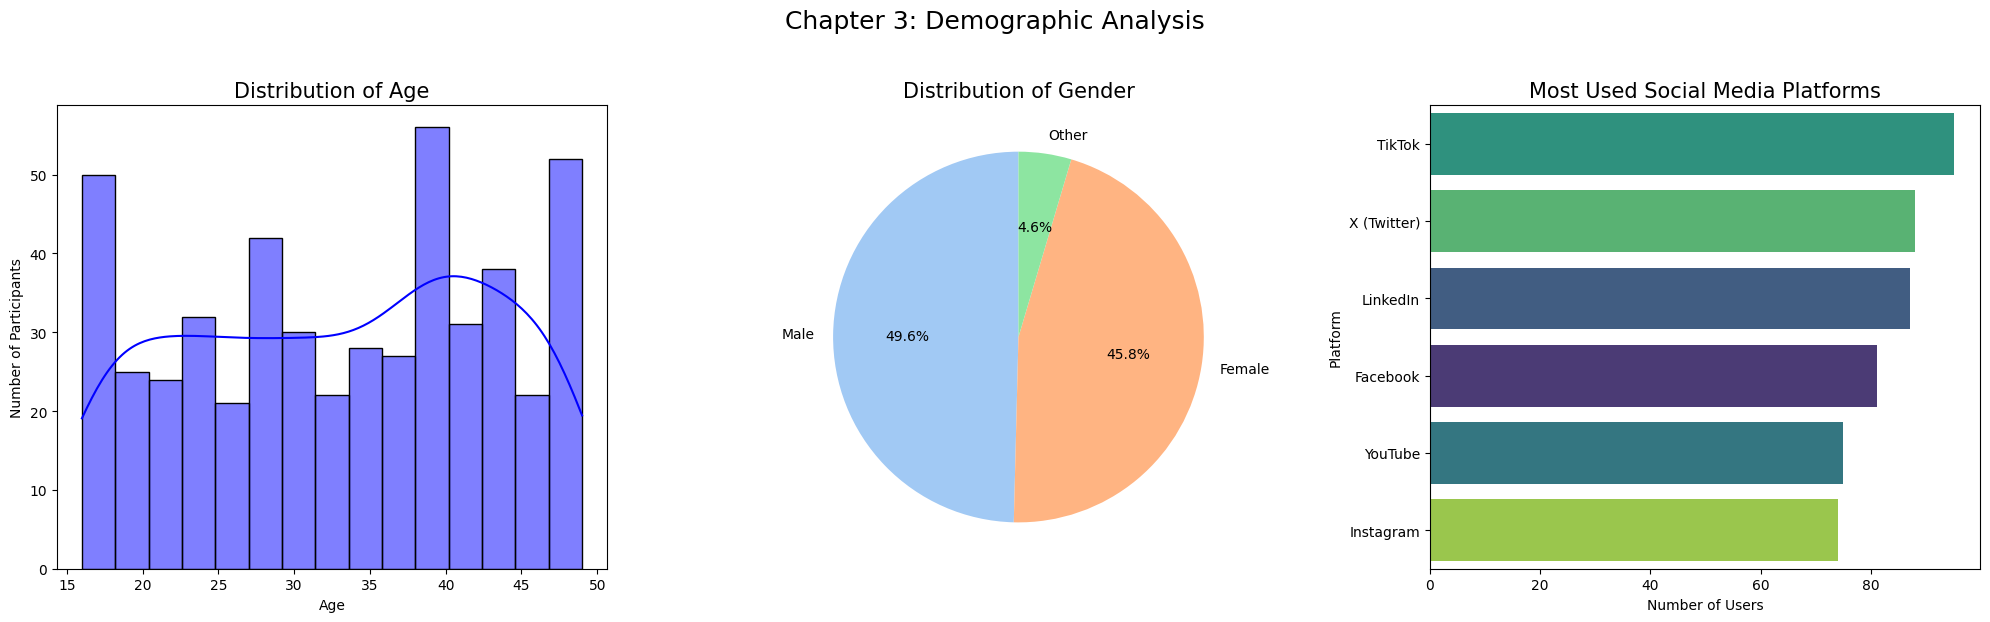

In [4]:
# visualize
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle("Chapter 3: Demographic Analysis", fontsize=18, y=1.03)

# plot 1: Age Distribution
sns.histplot(df["Age"], bins=15, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Distribution of Age", fontsize=15)
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Number of Participants")

# plot 2: Gender Distribution
gender_pie_counts = df["Gender"].value_counts()
axes[1].pie(
    gender_pie_counts,
    labels=gender_pie_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=sns.color_palette("pastel"),
)
axes[1].set_title("Distribution of Gender", fontsize=15)

# plot 3: Platform Distribution
sns.countplot(
    y=df["Social_Media_Platform"],
    hue=df["Social_Media_Platform"],
    ax=axes[2],
    order=df["Social_Media_Platform"].value_counts().index,
    palette="viridis",
    legend=False,
)
axes[2].set_title("Most Used Social Media Platforms", fontsize=15)
axes[2].set_xlabel("Number of Users")
axes[2].set_ylabel("Platform")

plt.tight_layout()
plt.show()

### Chapter 3: Demographic Summary

Based on the analysis above, we have a clear profile of our 500 participants:

* **Age:** The group is diverse, ranging from **16 to 49 years old**, with a **mean age of 33**. The distribution is fairly spread out, with no single age group dominating.
* **Gender:** The dataset is well-balanced, with participants identifying as **49.6% Male**, **45.8% Female**, and **4.6% Other**.
* **Platform:** Platform usage is **very evenly distributed**. TikTok (19.0%) is the most used, but all major platforms (X, LinkedIn, Facebook, YouTube, Instagram) are represented almost equally.

**Conclusion:** Our dataset represents a balanced and diverse group of adults. This balance is excellent, as it prevents our analysis from being skewed by a single platform or gender. We can now proceed to analyze their self-reported behavior and well-being.